## Árvores de regressão - exercícios 02

Este exercício será uma continuação do anterior, mesma base, mesmas variáveis - vamos tentar buscar a 'melhor árvore'.

A descrição das variáveis está abaixo:

| Variavel | Descrição|
|-|-|
|CRIM| taxa de crimes per-cápita da cidade | 
|ZN| proporção de terrenos residenciais zoneados para lotes com mais de 25.000 pés quadrados. |
|INDUS| proporção de acres de negócios não varejistas por cidade |
|CHAS |vale 1 se o terreno faz fronteira com o *Charles River*; 0 caso contrário |
|NOX| Concentração de óxido nítrico (em partes por 10 milhões) |
|RM| número médio de quartos por habitação |
|AGE| proporção de unidades ocupadas pelo proprietário construídas antes de 1940 |
|DIS| distâncias ponderadas até cinco centros de empregos de Boston |
|RAD| índice de acessibilidade a rodovias radiais |
|TAX| taxa de imposto sobre a propriedade de valor total por \\$10,000 |
|PTRATIO| razão pupilo-professor da cidade |
|B| $ 1000 (Bk - 0,63) ^ 2 $ onde Bk é a proporção de negros por cidade |
|LSTAT| \%status inferior da população |
|MEDV| (variável resposta) Valor mediano das casas ocupadas pelo proprietário em US $ 1.000|

In [67]:
import pandas as pd
import numpy as np
import seaborn as sns
import requests
import matplotlib.pyplot as plt



from sklearn import datasets
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


In [4]:
# Como os dados não estão mais disponíveis para download direto pelo sklearn.
    ## Download dos dados
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])


    ## Download dos metadados

dados = requests.get(data_url)
encontrar = ['CRIM',"$1000's"]
indice = list()
for i in encontrar:
    puxar = dados.text.find(i)
    indice.append(puxar)
metadados = dados.text[indice[0]:indice[1]]
display(metadados.split('\n'))
meta = list()
for i in metadados.split('\n'):
    meta.append([i.replace('  ','-1')])
    
df_meta = pd.DataFrame(meta)
df_meta[0].str.split('-1', expand=True)[0]
X = pd.DataFrame(data)
X.columns = df_meta[0].str.split('-1', expand=True)[0].tolist()[:-1]
y = pd.Series(raw_df.values[1::2, 2], name=df_meta[0].str.split('-1', expand=True)[0].tolist()[-1:][0])

['CRIM     per capita crime rate by town',
 ' ZN       proportion of residential land zoned for lots over 25,000 sq.ft.',
 ' INDUS    proportion of non-retail business acres per town',
 ' CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)',
 ' NOX      nitric oxides concentration (parts per 10 million)',
 ' RM       average number of rooms per dwelling',
 ' AGE      proportion of owner-occupied units built prior to 1940',
 ' DIS      weighted distances to five Boston employment centres',
 ' RAD      index of accessibility to radial highways',
 ' TAX      full-value property-tax rate per $10,000',
 ' PTRATIO  pupil-teacher ratio by town',
 ' B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town',
 ' LSTAT    % lower status of the population',
 ' MEDV     Median value of owner-occupied homes in ']

In [5]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [6]:
y.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name:  MEDV, dtype: float64

### 1. Execute os passos do exercício anterior, até que você tenha uma árvore de regressão predizendo o valor do imóvel na base de treinamento.

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

reg = DecisionTreeRegressor(max_depth=4)
reg.fit(X_train,y_train)
predict = reg.predict(X_test)


### 2.  Calcule o caminho indicado pelos CCP-alfas dessa árvore.

In [61]:
# Alphas e Impurezas (MSE)
path = reg.cost_complexity_pruning_path(X_train, y_train)

# Retirando para uma variável
ccp_alphas, impurities = path.ccp_alphas, path.impurities


### 3. Paca cada valor de alpha obtido no item 2, treine uma árvore com o respectivo alfa, e guarde essa árvore em uma lista.

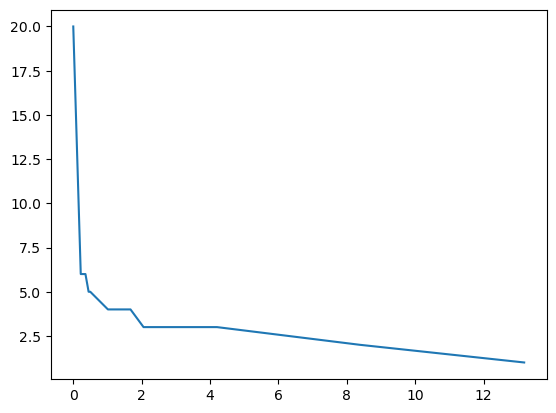

In [63]:
# 
regs = []

for ccp_alpha in ccp_alphas:
    reg = DecisionTreeRegressor(random_state=0, ccp_alpha=ccp_alpha)
    reg.fit(X_train, y_train)
    regs.append(reg)
    
tree_depths = [reg.tree_.max_depth for reg in regs]

plt.plot(ccp_alphas[:-1], tree_depths[:-1])

### 4. Para cada árvore na lista, calcule o MSE da árvore.

In [64]:
train_score = [mean_squared_error(y_train, reg.predict(X_train)) for reg in regs]
test_score = [mean_squared_error(y_test, reg.predict(X_test)) for reg in regs]


### 5. Monte um gráfico do MSE pelo alpha, escolha um valor de alpha perto do ponto de mínimo do MSE

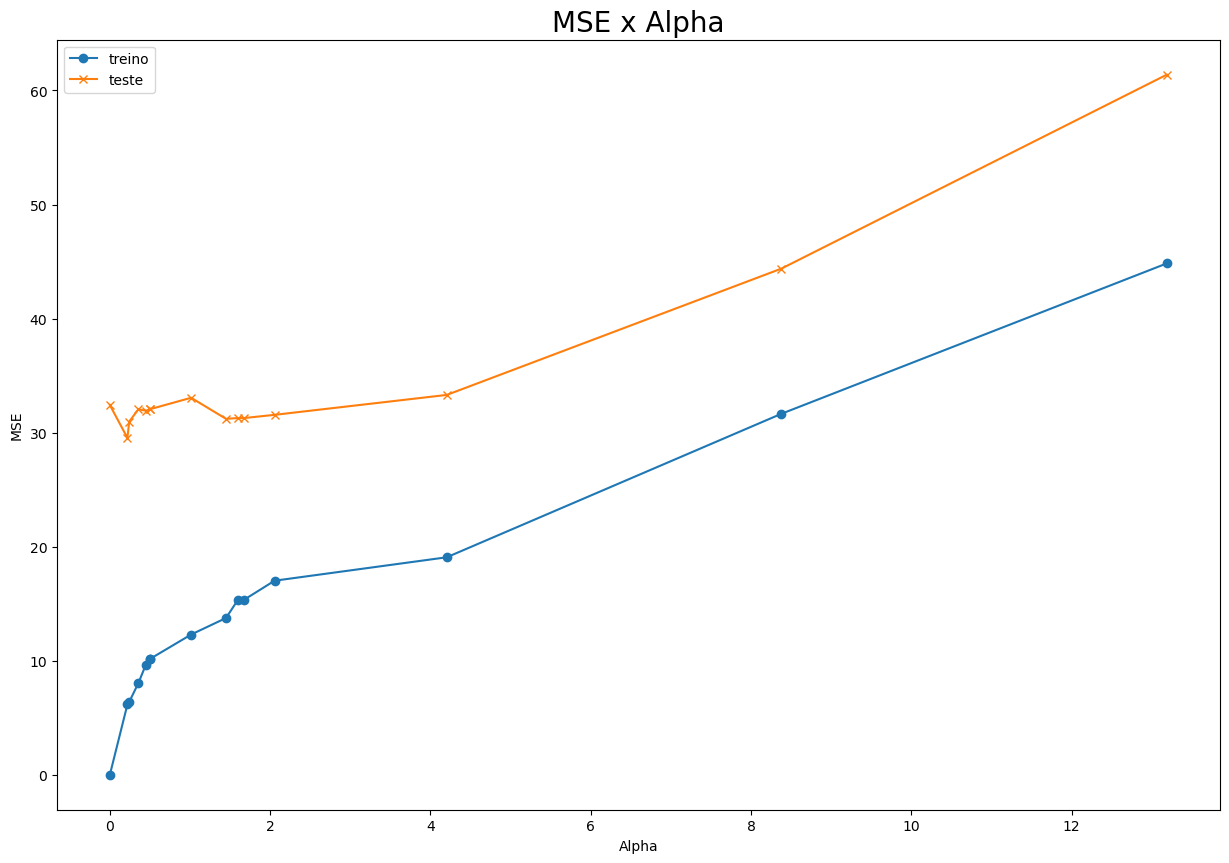

In [78]:
plt.figure(figsize=(15,10))

plt.plot(ccp_alphas[:-1], train_score[:-1], marker='o', label='treino')
plt.plot(ccp_alphas[:-1], test_score[:-1], marker='x', label='teste')
plt.title('MSE x Alpha', fontsize=20)
plt.xlabel("Alpha")
plt.ylabel("MSE")
plt.legend()
plt.show()

In [69]:
melhor_ccp = ccp_alphas[1]
print(f"O alpha que apresentou o melhor resultado foi o de valor igual a {melhor_ccp}")

O alpha que apresentou o melhor resultado foi o de valor igual a 0.21892326732671522


### 6. Calcule o R-quadrado dessa árvore encontrada no item acima

In [71]:
reg = DecisionTreeRegressor(random_state = 0, ccp_alpha=melhor_ccp)
reg.fit(X_train, y_train)
predict_train = r2_score(y_train, reg.predict(X_train))
predict_test = r2_score(y_test, reg.predict(X_test))
print(f"O r2 para os dados de treino foi igual a {predict_train}\nPara os dados de teste o resultado foi igual a {predict_test}")

O r2 para os dados de treino foi igual a 0.9276476654142177
Para os dados de teste o resultado foi igual a 0.637266940050273


### 7. Visualize esta árvore.

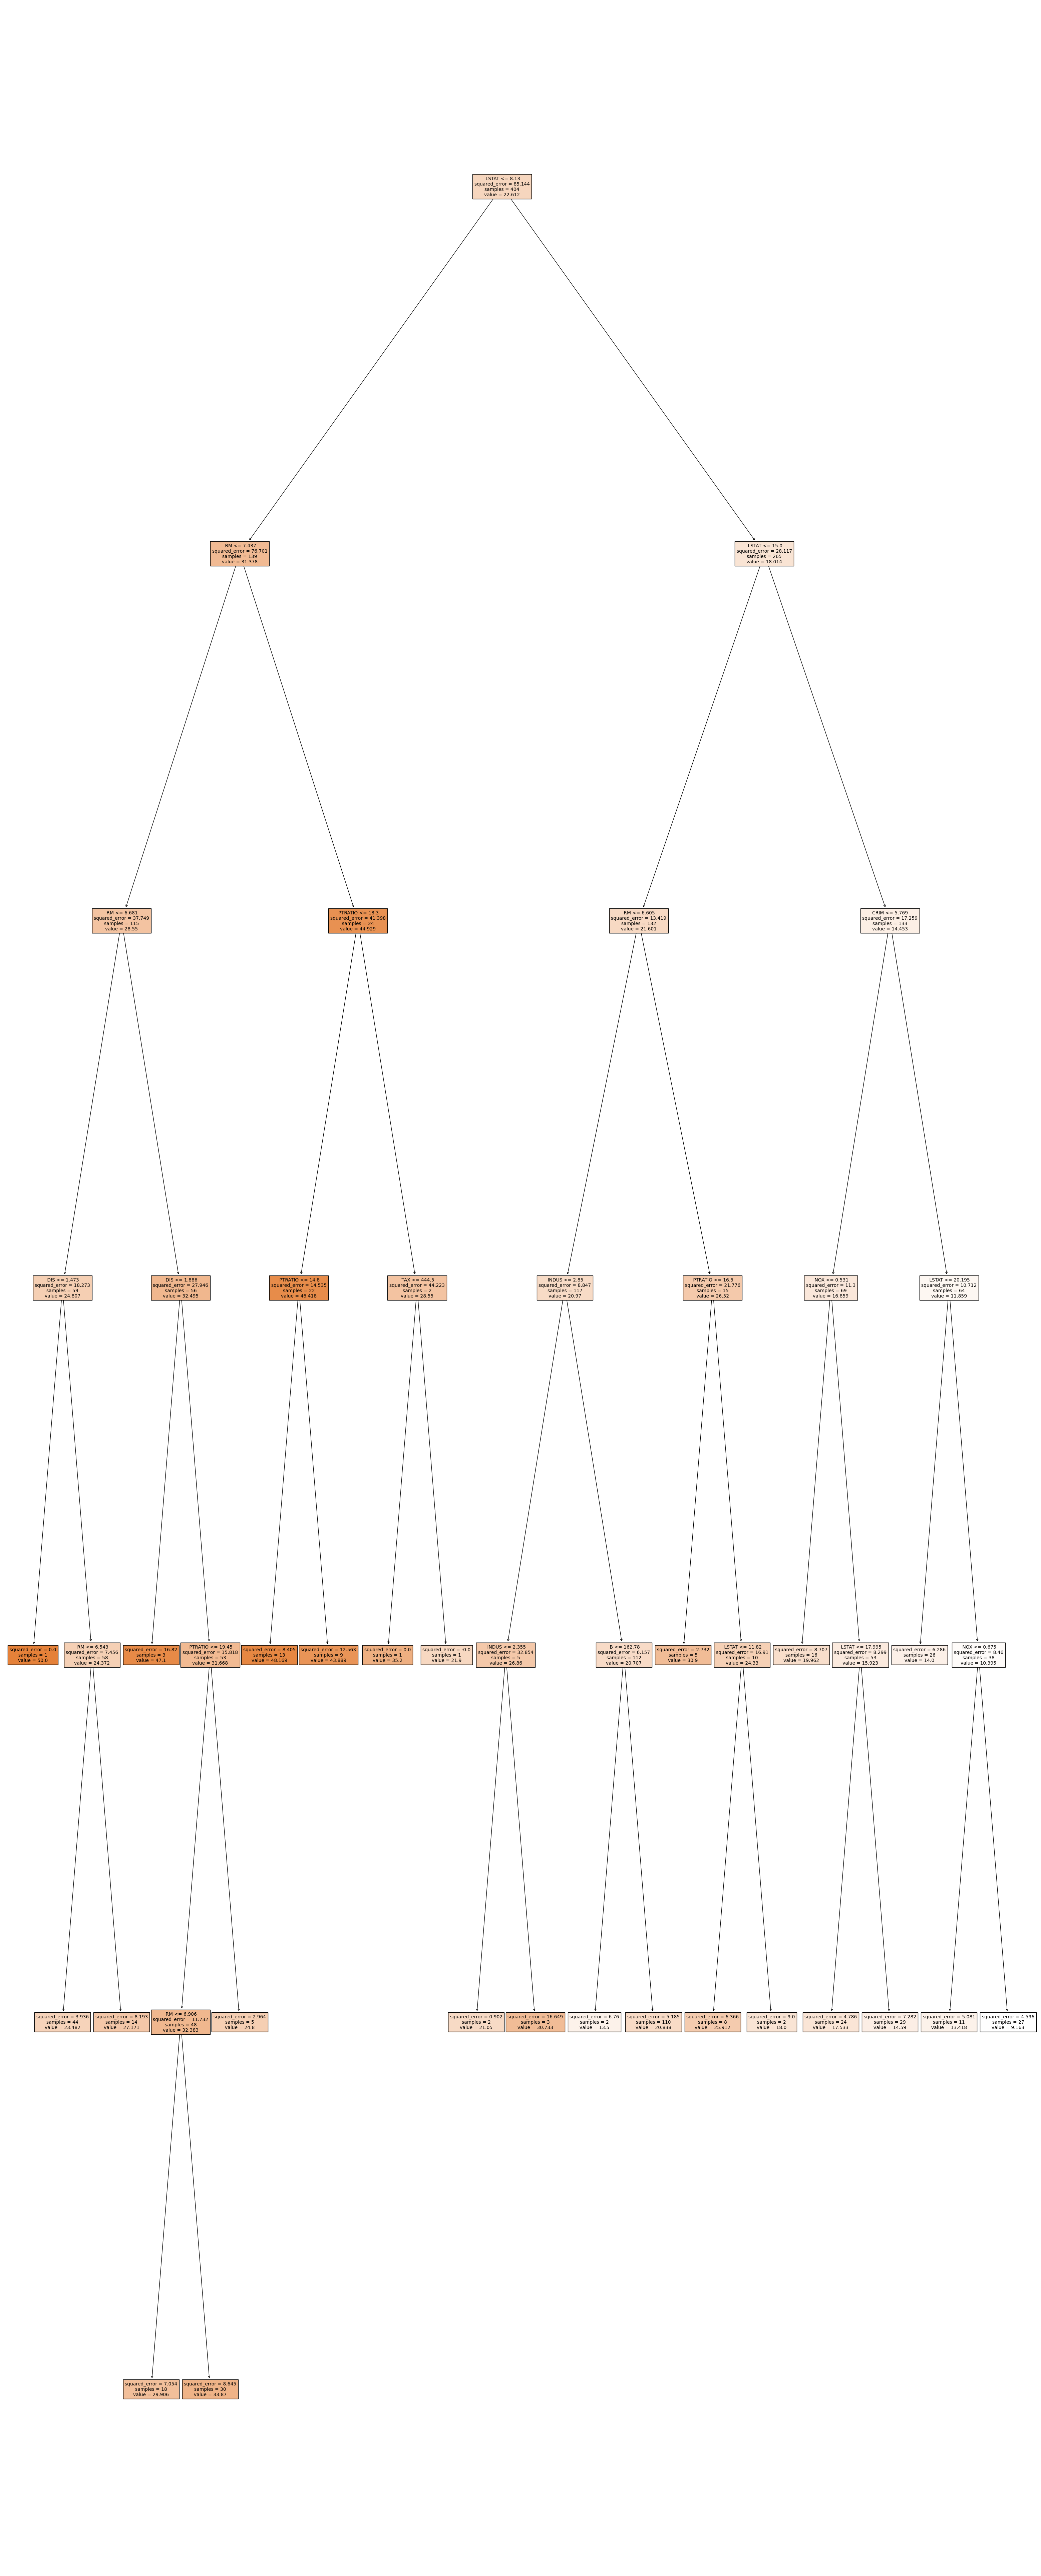

In [88]:
plt.figure(figsize=(40,100))
tp = tree.plot_tree(reg, feature_names = X.columns.tolist(), filled=True)